In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [79]:
# Warning
import warnings
import logging

warnings.filterwarnings("ignore")

import pandas as pd

# Завантажуємо тренувальні дані
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Завантажуємо тестові дані
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Перевіримо, як виглядають перші рядки даних
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Створюємо нову колонку Cabin_missing, яка показує, чи пропущені дані про кабіну
train_data['Cabin_missing'] = train_data['Cabin'].isnull().astype(int)

In [81]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [82]:
# Перевіряємо унікальні значення в 'Sex' і перетворюємо на числові значення
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


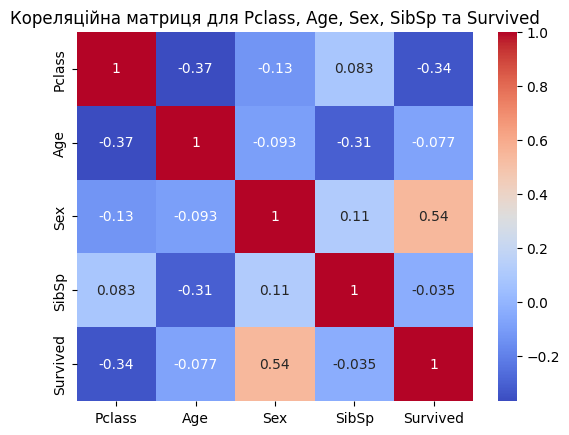

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Кореляційна матриця для класу квитка та віку з виживанням
corr_matrix = train_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Survived']].corr()

# Візуалізуємо кореляційну матрицю
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця для Pclass, Age, Sex, SibSp та Survived")
plt.show()

In [85]:
print(train_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Sex', 'Parch']].isnull().sum())
# Створюємо нову колонку, яка вказує на те, чи було пропущене значення
train_data['Age_was_missing'] = train_data['Age'].isnull().astype(int)


# Замість заповнення середнім ставимо умовне значення
train_data['Age'] = train_data['Age'].fillna(-1)



Pclass    0
Age       0
Fare      0
SibSp     0
Sex       0
Parch     0
dtype: int64


In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Створюємо модель RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Вибираємо фічі для моделі (виключаємо таргет)
X = train_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Sex','Parch']]
y = train_data['Survived']

# Навчаємо модель
model.fit(X, y)

# Оцінка важливості фіч
feature_importances = model.feature_importances_

# Перетворюємо результат у DataFrame для зручності
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортуємо за важливістю
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Виводимо результат
print(importance_df)

  Feature  Importance
2    Fare    0.294457
4     Sex    0.269145
1     Age    0.254923
0  Pclass    0.086725
3   SibSp    0.048023
5   Parch    0.046727


In [87]:
X_reduced = train_data[['Fare', 'Sex', 'Age', 'Pclass']]

model.fit(X_reduced, y)

RandomForestClassifier(random_state=42)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ділимо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Тренуємо модель на навчальних даних
model.fit(X_train, y_train)

# Прогнозуємо на тестових даних
y_pred = model.predict(X_test)

# Оцінюємо точність моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8491620111731844


In [89]:
# Перетворюємо колонку Sex в тестових даних на числові значення
test_data['Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})

test_data['Age_was_missing'] = test_data['Age'].isnull().astype(int)

# Замість заповнення середнім ставимо умовне значення
test_data['Age'] = test_data['Age'].fillna(-1)

# Заповнюємо пропущене значення в колонці 'Fare'
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

# Перевіряємо, чи немає пропущених значень у тестових даних
print(test_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Sex', 'Parch']].isnull().sum())


Pclass    0
Age       0
Fare      0
SibSp     0
Sex       0
Parch     0
dtype: int64


In [93]:
# Прогноз для тестових даних
predictions = model.predict(test_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Sex', 'Parch']])

# Створюємо DataFrame для сабміту
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Зберігаємо в CSV файл
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Submission file created!
